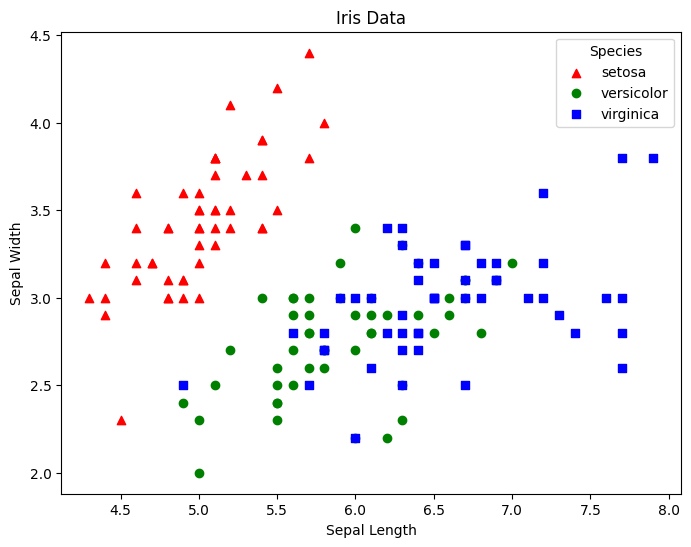

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris['Species'] = iris_data.target

# Define colors and shapes
colours = ['red', 'green', 'blue']
shapes = ['^', 'o', 's']  # '^' for triangle, 'o' for circle, 's' for square

# Plotting
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris['Species'].unique()):
    subset = iris[iris['Species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                color=colours[i], marker=shapes[i], label=iris_data.target_names[species])

# Add title and labels
plt.title('Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add legend
plt.legend(loc='upper right', title="Species")

# Show plot
plt.show()
